<a href="https://colab.research.google.com/github/VELETIVIJAYCHANDRA/Projects/blob/main/HOTEL_ROOM_BOOKING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [43]:
booking_data = pd.read_csv('/content/drive/MyDrive/hotel_bookings.csv')
print('The shape of the overall database is: ', booking_data.shape,'\n')

The shape of the overall database is:  (119390, 32) 



In [44]:
booking_data.loc[:,['is_canceled','children','country', 'agent', 'company']].info()
booking_data.country.fillna('-', inplace=True)
booking_data.agent.fillna(0, inplace=True)
booking_data.company.fillna(0, inplace=True)
booking_data.children.fillna(0, inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   is_canceled  119390 non-null  int64  
 1   children     119386 non-null  float64
 2   country      118902 non-null  object 
 3   agent        103050 non-null  float64
 4   company      6797 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 4.6+ MB


* Overall, 44224 bookings were canceled, accounting for 37 percent of booked stays.


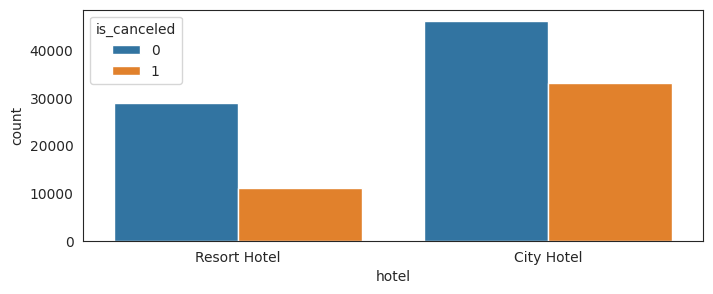

In [45]:
booking_data['pax'] = booking_data.children+booking_data.adults
booking_data['stay_nights'] = booking_data.stays_in_week_nights+booking_data.stays_in_weekend_nights
booking_data['bill']=booking_data.stay_nights*booking_data.adr
booking_data['room_assignment'] = booking_data['reserved_room_type']==booking_data['assigned_room_type']
print('* Overall, %2.0f bookings were canceled, accounting for %2.0f percent of booked stays.'
      %(booking_data.is_canceled.sum(), booking_data.is_canceled.mean()*100))
plt.figure(figsize=(8,3))
sns.set_style("white")
sns.countplot(x='hotel', hue='is_canceled', data=booking_data)
plt.show()

Cancellation Financial impact


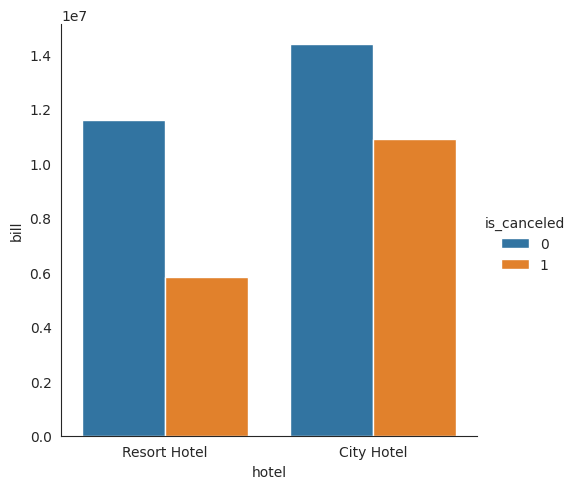

In [46]:
print('Cancellation Financial impact')
sns.catplot(x='hotel', y='bill', hue='is_canceled', estimator=sum, ci=None, kind='bar', data=booking_data)
plt.show()

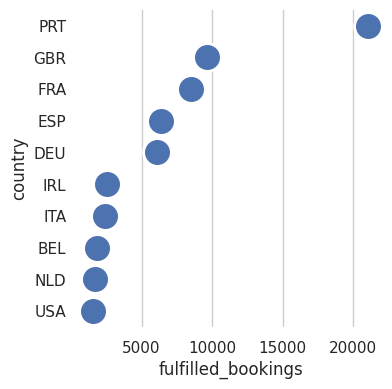

In [47]:
booking_country = pd.DataFrame(booking_data.groupby('country').sum())
booking_country = booking_country.loc[:,['is_canceled','stay_nights','pax']]
booking_country['booking_count'] = booking_data.groupby('country').hotel.count()
booking_country['cancellation_rate'] =  booking_country.is_canceled.div(booking_country.booking_count)
booking_country['fulfillment_rate'] =  1-booking_country.is_canceled.div(booking_country.booking_count)
booking_country['fulfilled_bookings'] =  booking_country['booking_count']-booking_country['is_canceled']
sns.set(style="whitegrid")
toprint = booking_country.reset_index().sort_values(by='fulfilled_bookings', ascending=False).head(10)
g = sns.PairGrid(toprint, x_vars=toprint.columns[7:8], y_vars=['country'], height=4)
sns.despine(left=True, bottom=True)
g.map(sns.stripplot, size=20, orient="h", palette="ch:s=1,r=-.1,h=1_r", linewidth=2, edgecolor="w")
plt.show()

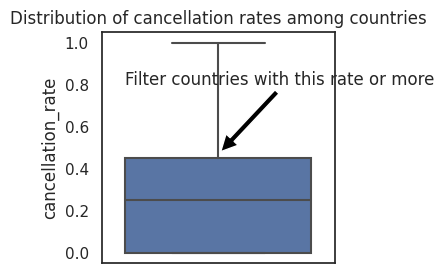

In [48]:
plt.figure(figsize=(3,3))
sns.set_style("white")
sns.boxplot(data=booking_country, y='cancellation_rate')
plt.annotate('Filter countries with this rate or more', xy=(0.01, 0.48), xytext=(-0.4, 0.8),
            arrowprops=dict(facecolor='black', shrink=1),
            )
plt.title('Distribution of cancellation rates among countries')
plt.show()

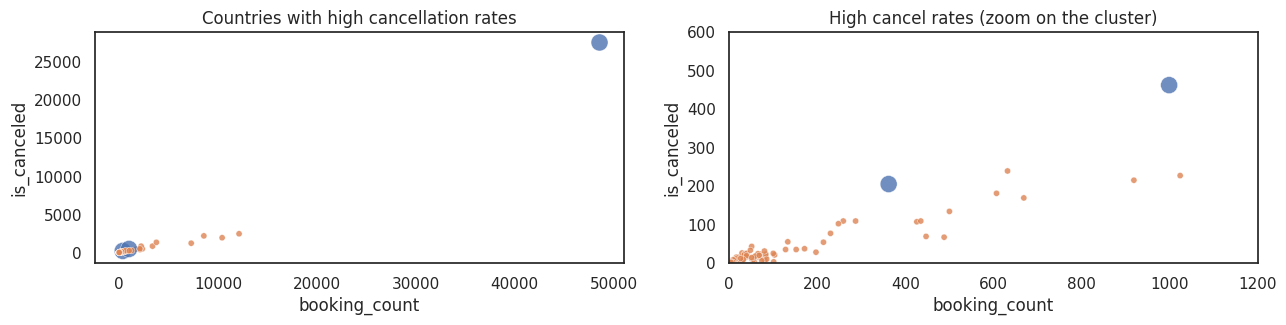

In [49]:
#print(booking_country.quantile(0.75))
booking_country_plot = booking_country
booking_country_plot['hue'] = (booking_country['cancellation_rate']<0.45)|(booking_country['booking_count']<100)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,3))
sns.set_style('whitegrid')
ax1.set_title('Countries with high cancellation rates')
sns.scatterplot(data=booking_country_plot, x='booking_count', y='is_canceled', size='hue', hue='hue', sizes=(20,150), alpha=0.8, legend=False, ax=ax1)
ax2.set_title('High cancel rates (zoom on the cluster)')
sns.scatterplot(data=booking_country_plot, x='booking_count', y='is_canceled', hue='hue', size='hue', sizes=(20,150), alpha=0.8, legend=False, ax=ax2)
plt.xlim(0,1200)
plt.ylim(0,600)
plt.show()

In [50]:
print('If we do not account for countries with negligible booking counts, the TOP 3 countries in terms of cancelling reservations are : Portugal, China and Angola.')
display(booking_country_plot[booking_country_plot['hue']==False].sort_values(by='is_canceled', ascending=False).loc[:,'is_canceled':'cancellation_rate'])

If we do not account for countries with negligible booking counts, the TOP 3 countries in terms of cancelling reservations are : Portugal, China and Angola.


,is_canceled,stay_nights,pax,booking_count,cancellation_rate
country,,,,,
PRT,27519,141654,89599.0,48590,0.566351
CHN,462,2642,2021.0,999,0.462462
AGO,205,2938,647.0,362,0.566298


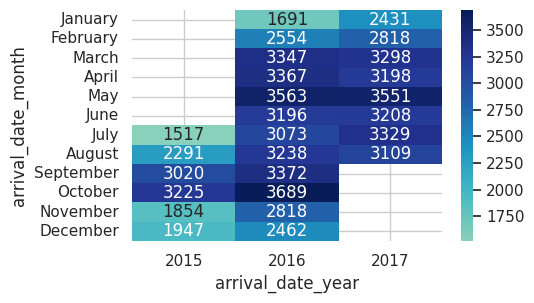

In [51]:
bookings = booking_data[booking_data['is_canceled']==0].pivot_table(index='arrival_date_month', columns='arrival_date_year', values='hotel', aggfunc=len, fill_value=0)
bookings.index = pd.CategoricalIndex(bookings.index, categories=['January', 'February', 'March', 'April','May','June','July', 'August','September', 'October', 'November', 'December'], ordered=True)
bookings = bookings.sort_index()
mask = np.array([[1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1]])
f, ax = plt.subplots(figsize=(5, 3))
sns.heatmap(bookings, center=2000, annot=True, mask=mask, fmt="d", ax=ax, cmap="YlGnBu")
sns.set_context('paper')
plt.show()

In [52]:
print('The maximum correlation between \'is_canceled\' and any other numeric feature is  %2.2F'
      %booking_data.corr().loc['lead_time':,'is_canceled'].abs().max())

The maximum correlation between 'is_canceled' and any other numeric feature is  0.29


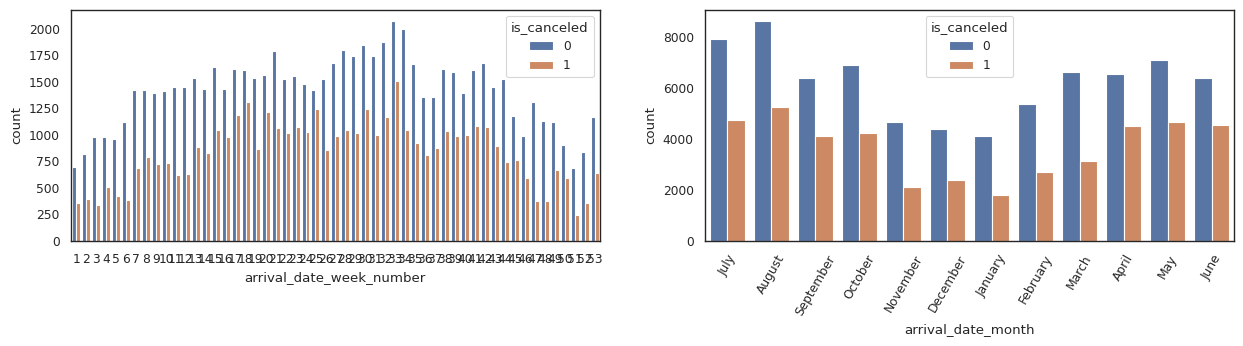

In [53]:
sns.set_style("white")
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,3))
sns.countplot(data=booking_data, x='arrival_date_week_number', hue='is_canceled', ax=ax1)
sns.countplot(data=booking_data, x='arrival_date_month', hue='is_canceled', ax=ax2)
plt.xticks(rotation=60)
plt.show()

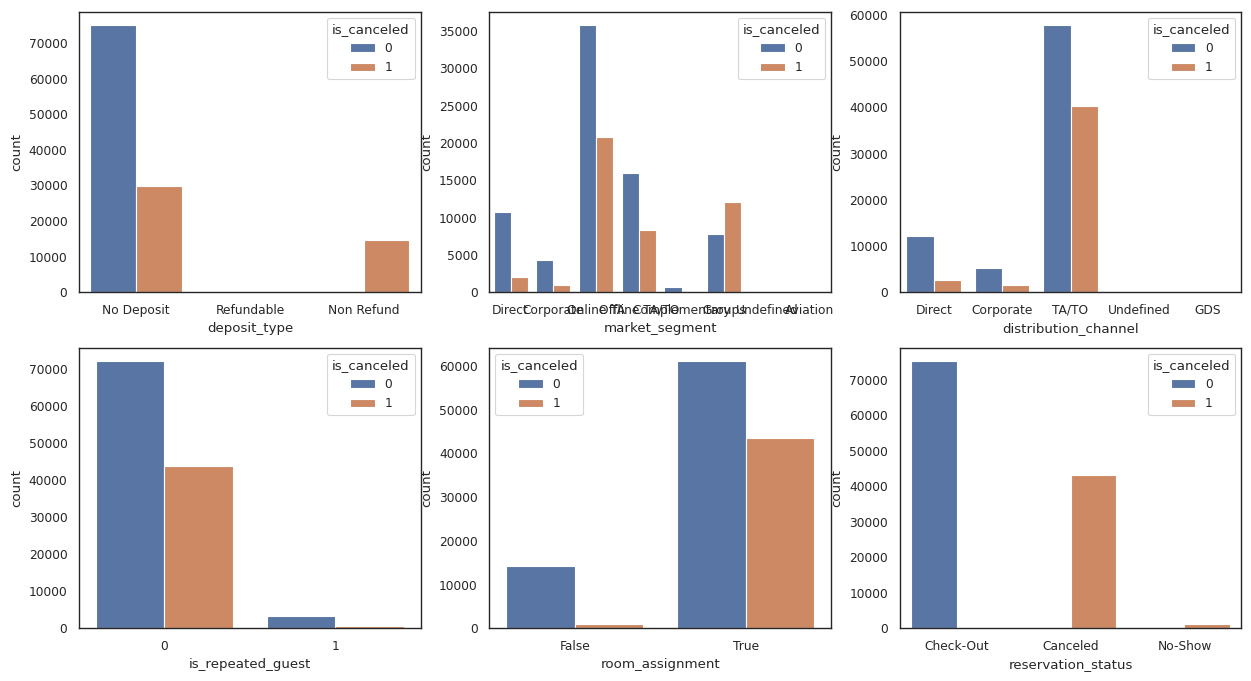

In [54]:
sns.set_style("white")
fig, axes = plt.subplots(2, 3, figsize=(15,8))
sns.countplot(data=booking_data, x='deposit_type', hue='is_canceled', ax=axes[0][0])
sns.countplot(data=booking_data, x='market_segment', hue='is_canceled', ax=axes[0][1])
sns.countplot(data=booking_data, x='distribution_channel', hue='is_canceled', ax=axes[0][2])
sns.countplot(data=booking_data, x='is_repeated_guest', hue='is_canceled', ax=axes[1][0])
sns.countplot(data=booking_data, x='room_assignment', hue='is_canceled', ax=axes[1][1])
sns.countplot(data=booking_data, x='reservation_status', hue='is_canceled', ax=axes[1][2])
plt.show()

In [55]:
#Average bill amount = average adr for checked-out bookings * average stay duration
bb= booking_data[booking_data['is_canceled']==0].adr.mean()*booking_data[booking_data['is_canceled']==0].stay_nights.mean()
#Subset of fulfilled bookings = 680
rr = booking_data[(booking_data['stay_nights']==0) & (booking_data['is_canceled']==0)].is_canceled.value_counts()
print('The average amount to be expected from the bookings is $%.2f' %(bb*rr))
booking_data = booking_data[booking_data['stay_nights']!=0]

The average amount to be expected from the bookings is $230697.20


In [56]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import VotingClassifier, BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import roc_auc_score

In [57]:
bookings = booking_data[['is_canceled', 'lead_time', 'country', 'hotel', 'market_segment', 'distribution_channel', 'room_assignment', 'deposit_type', 'customer_type', 'is_repeated_guest']]
booking_data_dummies=pd.get_dummies(data=bookings, columns=['hotel', 'country', 'market_segment', 'distribution_channel', 'room_assignment', 'deposit_type', 'customer_type', 'is_repeated_guest'])
print(booking_data_dummies.shape)

(118675, 206)


In [58]:
X = booking_data_dummies.drop(['is_canceled'], axis=1).values
y = booking_data_dummies.is_canceled
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

In [59]:
model_t = DecisionTreeClassifier(criterion='entropy', random_state=7)
model_t.fit(X_train, y_train)
y_pred = model_t.predict(X_test)
print('Score :', accuracy_score(y_test, y_pred))

Score : 0.8133584248518383


In [60]:
model_k = KNN(n_neighbors=4)
model_k.fit(X_train, y_train)
y_pred = model_k.predict(X_test)
print('Score :', accuracy_score(y_test, y_pred))

Score : 0.8008875656545796


In [61]:
model_l = LogisticRegression(random_state=7, solver='liblinear')
model_l.fit(X_train, y_train)
y_pred = model_l.predict(X_test)
print('Score :', accuracy_score(y_test, y_pred))

Score : 0.7767322978400697


In [62]:
classifiers = [('Logistic Regression', model_l),
('K Nearest Neighbours', model_k),
('Classification Tree', model_t)]
vc = VotingClassifier(estimators=classifiers)
vc.fit(X_train, y_train)
y_pred = vc.predict(X_test)
print('Voting Classifier: {:.3f}'.format(accuracy_score(y_test, y_pred)))

Voting Classifier: 0.816


In [63]:
bc = BaggingClassifier(base_estimator=model_l, n_estimators=100)
bc.fit(X_train, y_train)
y_pred = bc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of Bagging Classifier: {:.3f}'.format(accuracy))

Accuracy of Bagging Classifier: 0.777


In [64]:
rf = RandomForestClassifier(n_estimators=400, random_state=7)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

In [65]:
print('Accuracy of Random Forest Classifier: {:.3f}'.format(accuracy))

Accuracy of Random Forest Classifier: 0.815


In [66]:
dt = DecisionTreeClassifier(max_depth=15, random_state=7)
adb_clf = AdaBoostClassifier(base_estimator=dt, n_estimators=500)
adb_clf.fit(X_train, y_train)
y_pred_proba = adb_clf.predict_proba(X_test)[:,1]
adb_clf_roc_auc_score = roc_auc_score(y_test, y_pred_proba)
print('Accuracy of ADABoosted Descision Tree Classifier: {:.3f}'.format(adb_clf_roc_auc_score))

Accuracy of ADABoosted Descision Tree Classifier: 0.887


In [67]:
booking_sample = booking_data.sample(4420).sort_values(by='bill', ascending=False)
booking_sample.bill.sum()
booking_sample_0 = booking_sample[booking_sample['is_canceled']==0].sort_values(by='bill', ascending=False).head(int(4420*0.113)).bill.sum()
booking_sample_1 = booking_sample[booking_sample['is_canceled']==1].sort_values(by='bill', ascending=False).head(int(4420*0.113)).bill.sum()
upper_bound = booking_sample.bill.sum() + booking_sample_0
lower_bound = booking_sample.bill.sum() - booking_sample_1
print('The actual month revenue if between %.2f and %.2f of the predicted sum.' %(upper_bound/booking_sample.bill.sum(), lower_bound/booking_sample.bill.sum()))

The actual month revenue if between 1.27 and 0.76 of the predicted sum.


In [68]:
print('* All in all, a rough calculation to optimally overbook the establishment at peak seasons is', int(88.7/0.6),'%')

* All in all, a rough calculation to optimally overbook the establishment at peak seasons is 147 %
